### Failed Banklist Analysis

The FDIC is often appointed as receiver for failed banks. This list includes banks which have failed since October 1, 2000.

We are going to explore the following:

1) Cities which have the most failed banks

2) Institutions that have acquired the most failed banks

3) Banks Failed Per Year

In [10]:
import pandas as pd
import matplotlib.pyplot as plt


In [20]:
# Reading the data

banks = pd.read_csv('banklist.csv', encoding='windows-1252') #use the appropirated encoding
banks.head()

,Bank Name,City,State,Cert,Acquiring Institution,Closing Date,Fund
0,Heartland Tri-State Bank,Elkhart,KS,25851,"Dream First Bank, N.A.",28-Jul-23,10544
1,First Republic Bank,San Francisco,CA,59017,"JPMorgan Chase Bank, N.A.",1-May-23,10543
2,Signature Bank,New York,NY,57053,"Flagstar Bank, N.A.",12-Mar-23,10540
3,Silicon Valley Bank,Santa Clara,CA,24735,First–Citizens Bank & Trust Company,10-Mar-23,10539
4,Almena State Bank,Almena,KS,15426,Equity Bank,23-Oct-20,10538


In [21]:
banks.columns 

Index(['Bank Name ', 'City ', 'State ', 'Cert ', 'Acquiring Institution ',
       'Closing Date ', 'Fund'],
      dtype='object')

In [22]:
# Some of the column names have trailing spaces in them. They can be cleaned. 

banks.columns = banks.columns.str.strip()
banks.columns

Index(['Bank Name', 'City', 'State', 'Cert', 'Acquiring Institution',
       'Closing Date', 'Fund'],
      dtype='object')

In [23]:
# Dropping Unwanted Columns

banks = banks.drop(['Cert', 'Fund'], axis=1
banks.head()

,Bank Name,City,State,Acquiring Institution,Closing Date
0,Heartland Tri-State Bank,Elkhart,KS,"Dream First Bank, N.A.",28-Jul-23
1,First Republic Bank,San Francisco,CA,"JPMorgan Chase Bank, N.A.",1-May-23
2,Signature Bank,New York,NY,"Flagstar Bank, N.A.",12-Mar-23
3,Silicon Valley Bank,Santa Clara,CA,First–Citizens Bank & Trust Company,10-Mar-23
4,Almena State Bank,Almena,KS,Equity Bank,23-Oct-20


Cities which have the most failed banks:

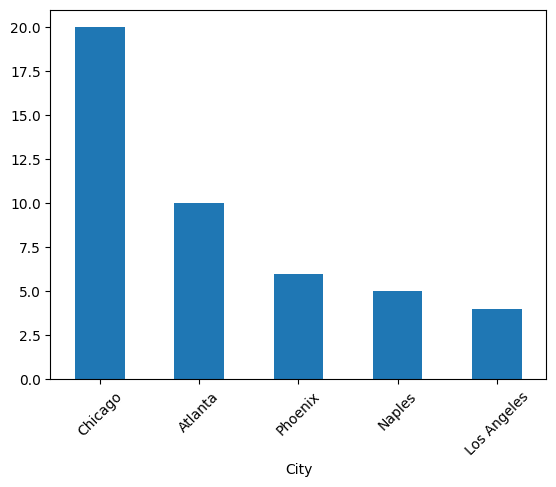

In [50]:
topFiveCities = banks['City'].value_counts().head()
topFiveCities.plot(kind='bar')
plt.xticks(rotation=45)
plt.show()

 Institutions that have aquired the most failed banks :

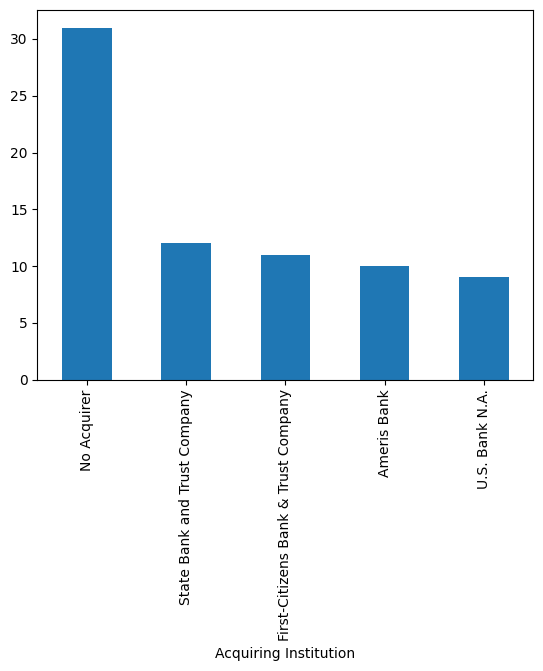

In [57]:
topFiveAquirers = banks['Acquiring Institution'].value_counts().head()
topFiveAquirers.plot(kind='bar') 
plt.show()

Year has the largest number of failed banks :

In [34]:
# Converting 'Closting Date' Column type to datetime()
banks['Closing Date'] = pd.to_datetime(banks['Closing Date'])

/var/folders/dx/m2j57nt536l3dbwgb3vxxlyw0000gn/T/ipykernel_86955/2623641887.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  banks['Closing Date'] = pd.to_datetime(banks['Closing Date'])


In [37]:
# counts per year

ycounts = banks.groupby(banks['Closing Date'].dt.year).size()
ycounts

Closing Date
2000      2
2001      4
2002     11
2003      3
2004      4
2007      3
2008     25
2009    140
2010    157
2011     92
2012     51
2013     24
2014     18
2015      8
2016      5
2017      8
2019      4
2020      4
2023      4
dtype: int64

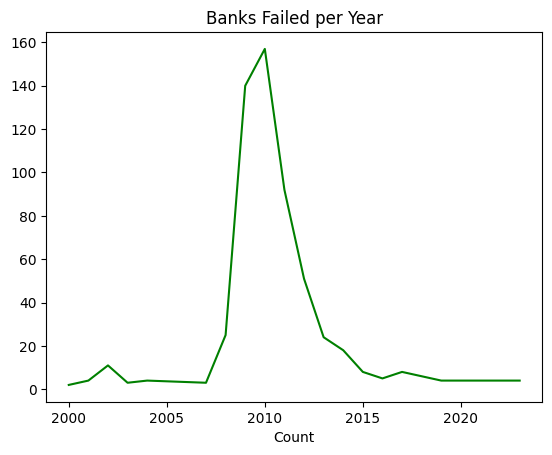

In [38]:
ycounts.plot(kind='line', color='green')
plt.xlabel('Year')
plt.xlabel('Count')
plt.title('Banks Failed per Year')
plt.show()